In [2]:
import os
import numpy as np
import librosa
from scipy.stats import kstest, shapiro
from scipy.optimize import minimize, fmin

# 设置输入音频文件夹
input_folder = 'E:\Australia\wav3376'  # 替换为你的音频文件夹路径

# 获取音频文件列表
audio_files = [f for f in os.listdir(input_folder) if f.endswith('.wav')]

# 定义目标函数进行Kolmogorov-Smirnov统计值优化
def objective_ks(params):
    gain_value, bias_value, power_value, time_constant_value, eps_value = params
    if gain_value<0 or bias_value<0 or power_value<0 or time_constant_value<0 or eps_value<0:
        return np.inf
    if gain_value<=0 or gain_value>=1:
        return np.inf
    if power_value<=0 or power_value>=1:
        return np.inf
    pcen_magnitudes = []
    for audio_file in audio_files:
        filepath = os.path.join(input_folder, audio_file)
        y, sr = librosa.load(filepath, sr=6000)
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512, n_mels=64, power=1.0, center=False)
        S_pcen = librosa.pcen(S * (2**31), sr=sr, hop_length=512, gain=gain_value, bias=bias_value, power=power_value, time_constant=time_constant_value, eps=eps_value, max_size=1)
        pcen_magnitudes.append(S_pcen.flatten())
    
    pcen_magnitudes = np.array(pcen_magnitudes)
    pcen_magnitudes = pcen_magnitudes.reshape(-1,)
    print(f"Entire dataset shape: {pcen_magnitudes.shape}")
    pcen_magnitudes = (pcen_magnitudes - np.mean(pcen_magnitudes)) / np.std(pcen_magnitudes)
    ks_stat = kstest(pcen_magnitudes, 'norm').statistic
    print(ks_stat)
    
    return ks_stat

# 初始参数猜测
initial_guess = [0.98, 2, 0.5, 0.4, 1e-06]

# fmin search for Kolmogorov-Smirnov
optimals_ks = fmin(objective_ks, initial_guess)
print(f"Optimized parameters for Kolmogorov-Smirnov: {optimals_ks}")

Entire dataset shape: (12788160,)
0.17700538121756648
Entire dataset shape: (12788160,)
0.17767530967565337
Entire dataset shape: (12788160,)
0.17854683728894327
Entire dataset shape: (12788160,)
0.1819766745099176
Entire dataset shape: (12788160,)
0.17700538121756804
Entire dataset shape: (12788160,)
0.14915389754899144
Entire dataset shape: (12788160,)
0.12189518386997422
Entire dataset shape: (12788160,)
0.15026446289728157
Entire dataset shape: (12788160,)
0.1418597019334764
Entire dataset shape: (12788160,)
0.12964240182307052
Entire dataset shape: (12788160,)
0.1139246969314035
Entire dataset shape: (12788160,)
0.09320254218720903
Entire dataset shape: (12788160,)
0.09009057788724151
Entire dataset shape: (12788160,)
0.07474396215139545
Entire dataset shape: (12788160,)
0.0806432226929723
Entire dataset shape: (12788160,)
0.07585444658260143
Entire dataset shape: (12788160,)
0.07230230780457114
Entire dataset shape: (12788160,)
0.07556942168260683
Entire dataset shape: (12788160,

0.0105896
Processing E:\Australia\wav3376\5297F9C1_220.wav, 1/865
0.009765625
Processing E:\Australia\wav3376\52981CE9_220.wav, 2/865
0.018463135
Processing E:\Australia\wav3376\529E0825_180.wav, 3/865
0.013946533
Processing E:\Australia\wav3376\529F448D_10.wav, 4/865
0.01373291
Processing E:\Australia\wav3376\529F83D5_240.wav, 5/865
0.0065612793
Processing E:\Australia\wav3376\529FF7D9_190.wav, 6/865
0.0059814453
Processing E:\Australia\wav3376\52A0F175_130.wav, 7/865
0.0072021484
Processing E:\Australia\wav3376\52A1068E_100.wav, 8/865
0.0072021484
Processing E:\Australia\wav3376\52A2386A_10.wav, 9/865
0.012084961
Processing E:\Australia\wav3376\52A2E4AD_80.wav, 10/865
0.014831543
Processing E:\Australia\wav3376\52A34399_270.wav, 11/865
0.0121154785
Processing E:\Australia\wav3376\52A41D90_0.wav, 12/865
0.016082764
Processing E:\Australia\wav3376\52A41D90_100.wav, 13/865
0.015411377
Processing E:\Australia\wav3376\52A41D90_190.wav, 14/865
0.012207031
Processing E:\Australia\wav3376\52

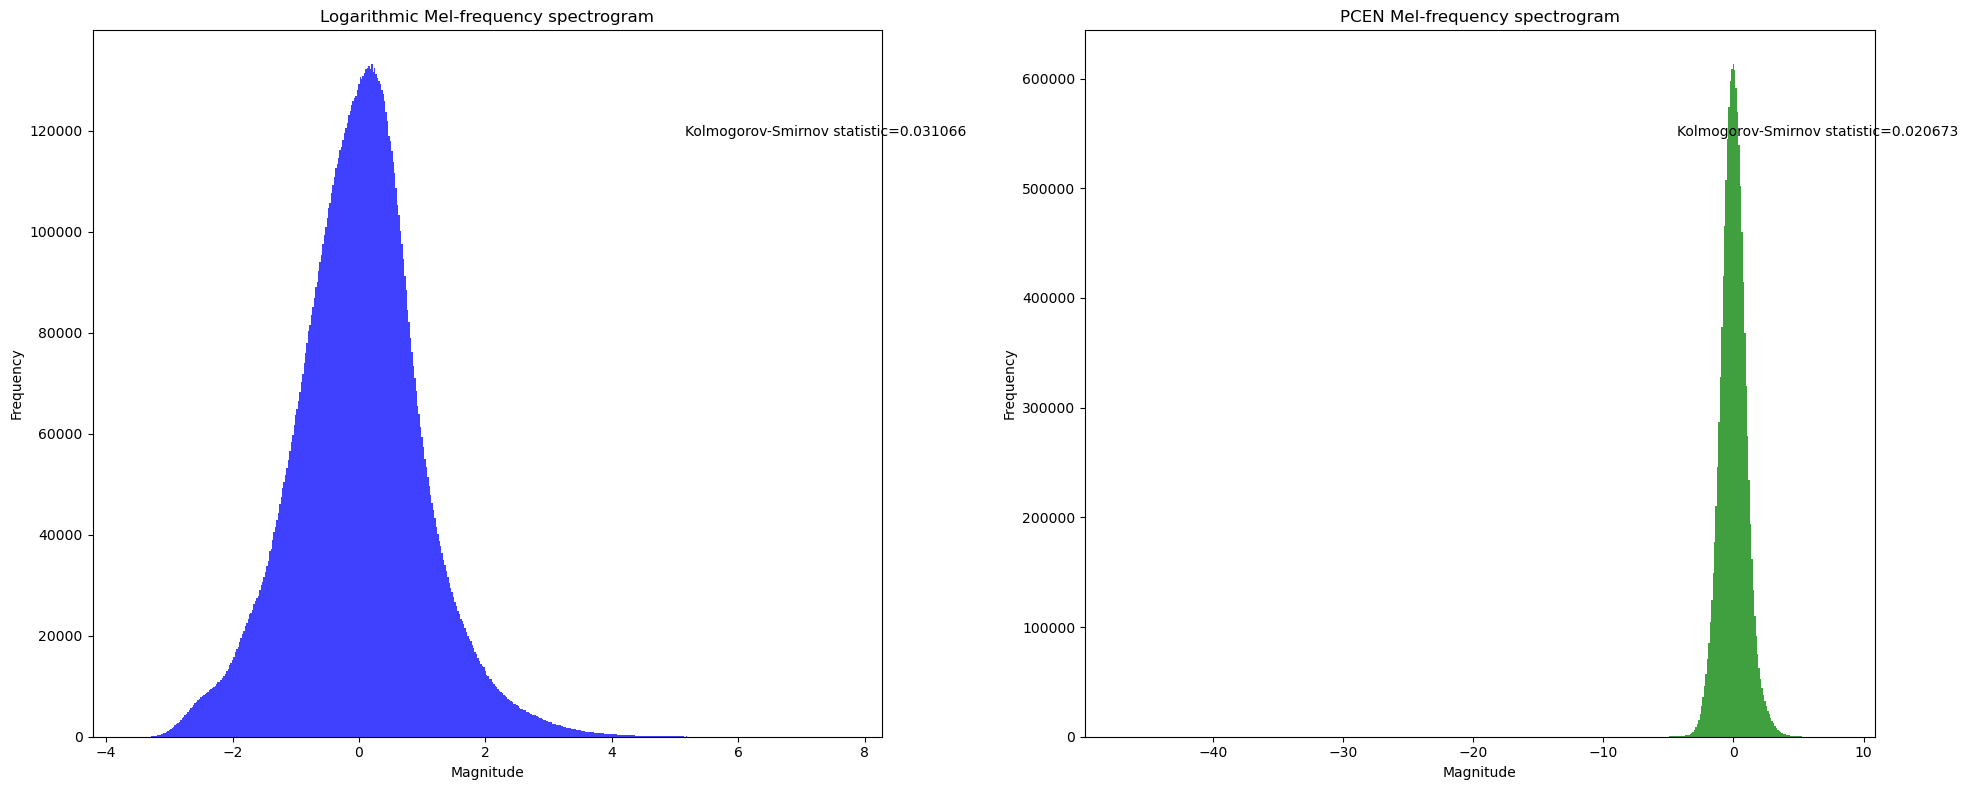

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy.stats import shapiro, kstest, norm

# 设置输入音频文件夹
input_folder = 'E:\Australia\wav3376'  # 替换为你的音频文件夹路径

# 获取音频文件列表
audio_files = [f for f in os.listdir(input_folder) if f.endswith('.wav')]

# 初始化列表以存储logmelspec和PCEN的幅度数据
logmelspec_magnitudes = []
pcen_magnitudes = []
stat_values = []
count = 1

for audio_file in audio_files:
    # 加载音频文件
    filepath = os.path.join(input_folder, audio_file)
    y, sr = librosa.load(filepath, sr=6000)
    print(np.max(y))
    print(f'Processing {filepath}, {count}/{len(audio_files)}')
    
    # 计算mel频谱图
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512, n_mels=64, power=1.0, center=False)
    
    # 对数变换
    S_dB = 20 * np.log10(S + 1e-6)  # 加1e-6防止log(0)
    logmelspec_magnitudes.extend(S_dB.flatten())

    # 应用PCEN，调整参数
    S_pcen = librosa.pcen(S * (2**31), sr=sr, hop_length=512, gain=9.99686079e-01, bias=3.17143741e+00, power=3.22058271e-01, time_constant=2.51005792e-03, eps=5.09658383e-07, max_size=1)
    pcen_magnitudes.extend(S_pcen.flatten())

    count += 1

# 将数据转换为numpy数组
logmelspec_magnitudes = np.array(logmelspec_magnitudes)
pcen_magnitudes = np.array(pcen_magnitudes)

print(f'maximum is {np.max(logmelspec_magnitudes)} and minimum is {np.min(logmelspec_magnitudes)}')
print(f'maximum is {np.max(pcen_magnitudes)} and minimum is {np.min(pcen_magnitudes)}')

# 标准化数据（零均值和单位方差）
logmelspec_magnitudes = (logmelspec_magnitudes - np.mean(logmelspec_magnitudes)) / np.std(logmelspec_magnitudes)
pcen_magnitudes = (pcen_magnitudes - np.mean(pcen_magnitudes)) / np.std(pcen_magnitudes)

print(f'maximum is {np.max(logmelspec_magnitudes)} and minimum is {np.min(logmelspec_magnitudes)}')
print(f'maximum is {np.max(pcen_magnitudes)} and minimum is {np.min(pcen_magnitudes)}')

# 进行 Kolmogorov-Smirnov 正态性检验
log_ks_stat, log_ks_p = kstest(logmelspec_magnitudes, 'norm')
pcen_ks_stat, pcen_ks_p = kstest(pcen_magnitudes, 'norm')

print(f'Log-mel spectrogram Kolmogorov-Smirnov test: statistic={log_ks_stat}, p-value={log_ks_p}')
print(f'PCEN spectrogram Kolmogorov-Smirnov test: statistic={pcen_ks_stat}, p-value={pcen_ks_p}')

# 绘制直方图
plt.figure(figsize=(20,8))

# 对数变换直方图
plt.subplot(1, 2, 1)
plt.hist(logmelspec_magnitudes, bins=500, density=False, alpha=0.75, color='blue')
plt.title('Logarithmic Mel-frequency spectrogram')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.annotate(f'Kolmogorov-Smirnov statistic={log_ks_stat:.6f}', xy=(0.75, 0.85), xycoords='axes fraction')

# PCEN直方图
plt.subplot(1, 2, 2)
plt.hist(pcen_magnitudes, bins=500, density=False, alpha=0.75, color='green')
plt.title('PCEN Mel-frequency spectrogram')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.annotate(f'Kolmogorov-Smirnov statistic={pcen_ks_stat:.6f}', xy=(0.75, 0.85), xycoords='axes fraction')

plt.tight_layout()
plt.show()

0.0105896
Processing E:\Australia\wav3376\5297F9C1_220.wav, 1/865
0.009765625
Processing E:\Australia\wav3376\52981CE9_220.wav, 2/865
0.018463135
Processing E:\Australia\wav3376\529E0825_180.wav, 3/865
0.013946533
Processing E:\Australia\wav3376\529F448D_10.wav, 4/865
0.01373291
Processing E:\Australia\wav3376\529F83D5_240.wav, 5/865
0.0065612793
Processing E:\Australia\wav3376\529FF7D9_190.wav, 6/865
0.0059814453
Processing E:\Australia\wav3376\52A0F175_130.wav, 7/865
0.0072021484
Processing E:\Australia\wav3376\52A1068E_100.wav, 8/865
0.0072021484
Processing E:\Australia\wav3376\52A2386A_10.wav, 9/865
0.012084961
Processing E:\Australia\wav3376\52A2E4AD_80.wav, 10/865
0.014831543
Processing E:\Australia\wav3376\52A34399_270.wav, 11/865
0.0121154785
Processing E:\Australia\wav3376\52A41D90_0.wav, 12/865
0.016082764
Processing E:\Australia\wav3376\52A41D90_100.wav, 13/865
0.015411377
Processing E:\Australia\wav3376\52A41D90_190.wav, 14/865
0.012207031
Processing E:\Australia\wav3376\52

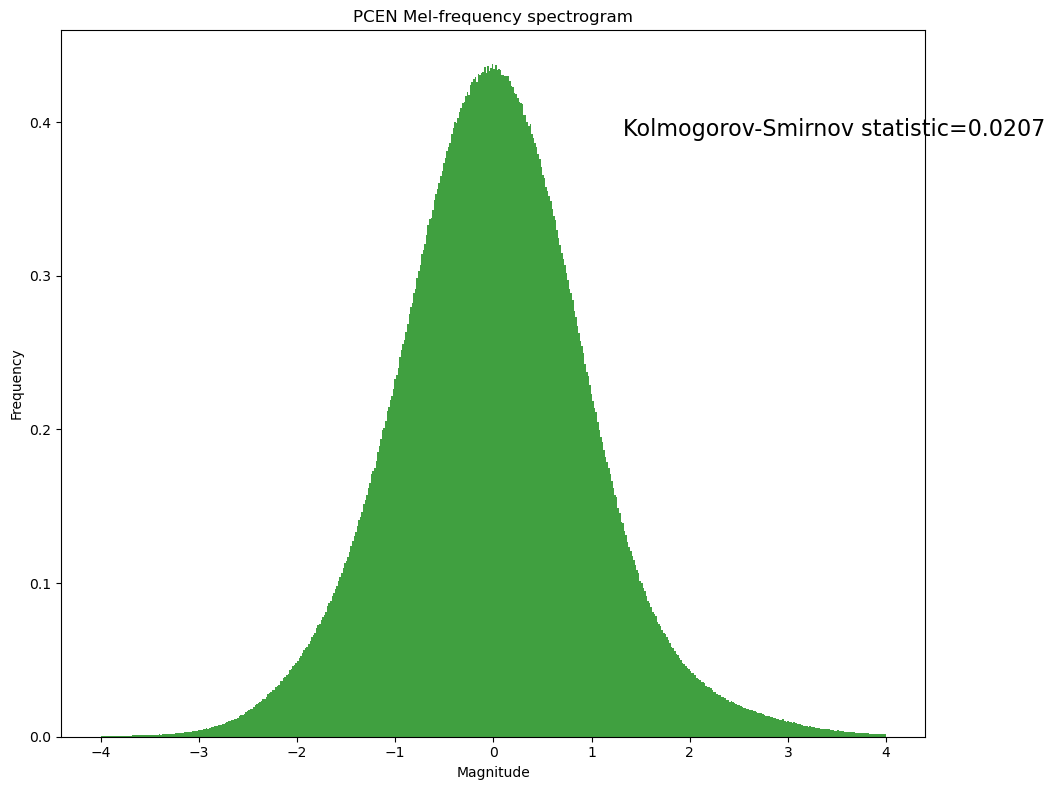

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy.stats import shapiro, kstest, norm

# 设置输入音频文件夹
input_folder = 'E:\Australia\wav3376'  # 替换为你的音频文件夹路径

# 获取音频文件列表
audio_files = [f for f in os.listdir(input_folder) if f.endswith('.wav')]

# 初始化列表以存储logmelspec和PCEN的幅度数据
logmelspec_magnitudes = []
pcen_magnitudes = []
stat_values = []
count = 1

for audio_file in audio_files:
    # 加载音频文件
    filepath = os.path.join(input_folder, audio_file)
    y, sr = librosa.load(filepath, sr=6000)
    print(np.max(y))
    print(f'Processing {filepath}, {count}/{len(audio_files)}')
    
    # 计算mel频谱图
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512, n_mels=64, power=1.0, center=False)
    
    # 对数变换
    S_dB = 20 * np.log10(S + 1e-6)  # 加1e-6防止log(0)
    logmelspec_magnitudes.extend(S_dB.flatten())

    # 应用PCEN，调整参数
    S_pcen = librosa.pcen(S * (2**31), sr=sr, hop_length=512, gain=9.99686079e-01, bias=3.17143741e+00, power=3.22058271e-01, time_constant=2.51005792e-03, eps=5.09658383e-07, max_size=1)
    pcen_magnitudes.extend(S_pcen.flatten())

    count += 1

# 将数据转换为numpy数组
logmelspec_magnitudes = np.array(logmelspec_magnitudes)
pcen_magnitudes = np.array(pcen_magnitudes)

print(f'maximum is {np.max(logmelspec_magnitudes)} and minimum is {np.min(logmelspec_magnitudes)}')
print(f'maximum is {np.max(pcen_magnitudes)} and minimum is {np.min(pcen_magnitudes)}')

# 标准化数据（零均值和单位方差）
logmelspec_magnitudes = (logmelspec_magnitudes - np.mean(logmelspec_magnitudes)) / np.std(logmelspec_magnitudes)
pcen_magnitudes = (pcen_magnitudes - np.mean(pcen_magnitudes)) / np.std(pcen_magnitudes)

print(f'maximum is {np.max(logmelspec_magnitudes)} and minimum is {np.min(logmelspec_magnitudes)}')
print(f'maximum is {np.max(pcen_magnitudes)} and minimum is {np.min(pcen_magnitudes)}')

# 进行 Kolmogorov-Smirnov 正态性检验
log_ks_stat, log_ks_p = kstest(logmelspec_magnitudes, 'norm')
pcen_ks_stat, pcen_ks_p = kstest(pcen_magnitudes, 'norm')

print(f'Log-mel spectrogram Kolmogorov-Smirnov test: statistic={log_ks_stat}, p-value={log_ks_p}')
print(f'PCEN spectrogram Kolmogorov-Smirnov test: statistic={pcen_ks_stat}, p-value={pcen_ks_p}')

# 绘制直方图
plt.figure(figsize=(20,8))

# 对数变换直方图
'''plt.subplot(1, 2, 1)
plt.hist(logmelspec_magnitudes, bins=500, range=(-4, 4), density=True, alpha=0.75, color='blue')
plt.title('Logarithmic Mel-frequency spectrogram')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.annotate(f'Kolmogorov-Smirnov statistic={log_ks_stat:.6f}', xy=(0.75, 0.85), xycoords='axes fraction')
'''
# PCEN直方图
plt.subplot(1, 2, 2)
plt.hist(pcen_magnitudes, bins=500, range=(-4, 4), density=True, alpha=0.75, color='green')
plt.title('PCEN Mel-frequency spectrogram')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.annotate(f'Kolmogorov-Smirnov statistic={pcen_ks_stat:.4f}', xy=(0.65, 0.85), fontsize=16,  xycoords='axes fraction')

plt.tight_layout()
plt.show()

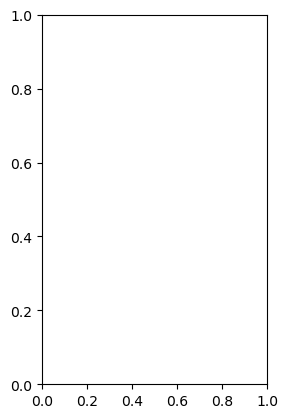

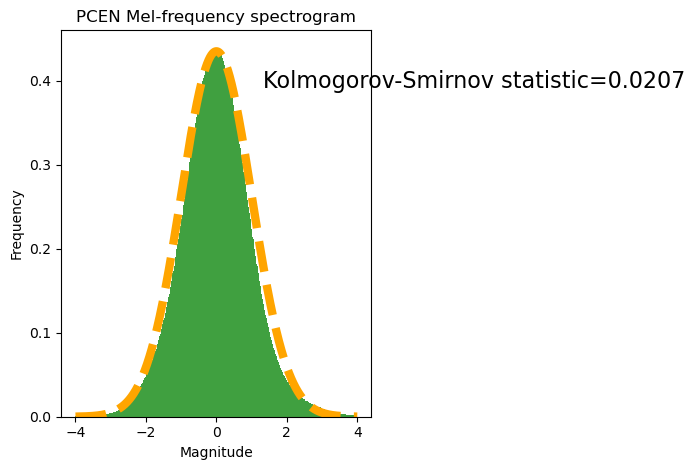

In [13]:
import scipy.stats as stats
plt.figure()
plt.hist(pcen_magnitudes, bins=500, range=(-4, 4), density=True, alpha=0.75, color='green')
plt.title('PCEN Mel-frequency spectrogram')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.annotate(f'Kolmogorov-Smirnov statistic={pcen_ks_stat:.4f}', xy=(0.65, 0.85), fontsize=16,xycoords='axes fraction')
x = np.linspace(-4, 4, len(pcen_magnitudes)) 
gaussian = stats.norm.pdf(x, np.mean(pcen_magnitudes), np.std(pcen_magnitudes)) 
gaussian = (gaussian/np.max(gaussian))*np.max(np.histogram(pcen_magnitudes, bins=500, density=True)[0])
plt.plot(x, gaussian, linestyle='--', color='orange', linewidth=6) 
plt.tight_layout()
plt.show()

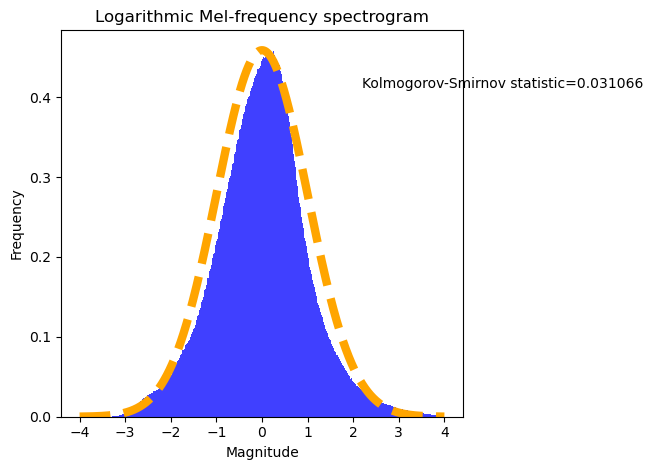

In [10]:
plt.figure()
plt.hist(logmelspec_magnitudes, bins=500, range=(-4, 4), density=True, alpha=0.75, color='blue')
plt.title('Logarithmic Mel-frequency spectrogram')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.annotate(f'Kolmogorov-Smirnov statistic={log_ks_stat:.6f}', xy=(0.75, 0.85), xycoords='axes fraction')

x = np.linspace(-4, 4, len(logmelspec_magnitudes)) 
gaussian = stats.norm.pdf(x, np.mean(logmelspec_magnitudes), np.std(logmelspec_magnitudes)) 
gaussian = (gaussian/np.max(gaussian))*np.max(np.histogram(logmelspec_magnitudes, bins=500, density=True)[0])
plt.plot(x, gaussian, linestyle='--', color='orange', linewidth=6) 
plt.tight_layout()
plt.show()

0.0105896
Processing E:\Australia\wav3376\5297F9C1_220.wav, 1/865
0.009765625
Processing E:\Australia\wav3376\52981CE9_220.wav, 2/865
0.018463135
Processing E:\Australia\wav3376\529E0825_180.wav, 3/865
0.013946533
Processing E:\Australia\wav3376\529F448D_10.wav, 4/865
0.01373291
Processing E:\Australia\wav3376\529F83D5_240.wav, 5/865
0.0065612793
Processing E:\Australia\wav3376\529FF7D9_190.wav, 6/865
0.0059814453
Processing E:\Australia\wav3376\52A0F175_130.wav, 7/865
0.0072021484
Processing E:\Australia\wav3376\52A1068E_100.wav, 8/865
0.0072021484
Processing E:\Australia\wav3376\52A2386A_10.wav, 9/865
0.012084961
Processing E:\Australia\wav3376\52A2E4AD_80.wav, 10/865
0.014831543
Processing E:\Australia\wav3376\52A34399_270.wav, 11/865
0.0121154785
Processing E:\Australia\wav3376\52A41D90_0.wav, 12/865
0.016082764
Processing E:\Australia\wav3376\52A41D90_100.wav, 13/865
0.015411377
Processing E:\Australia\wav3376\52A41D90_190.wav, 14/865
0.012207031
Processing E:\Australia\wav3376\52

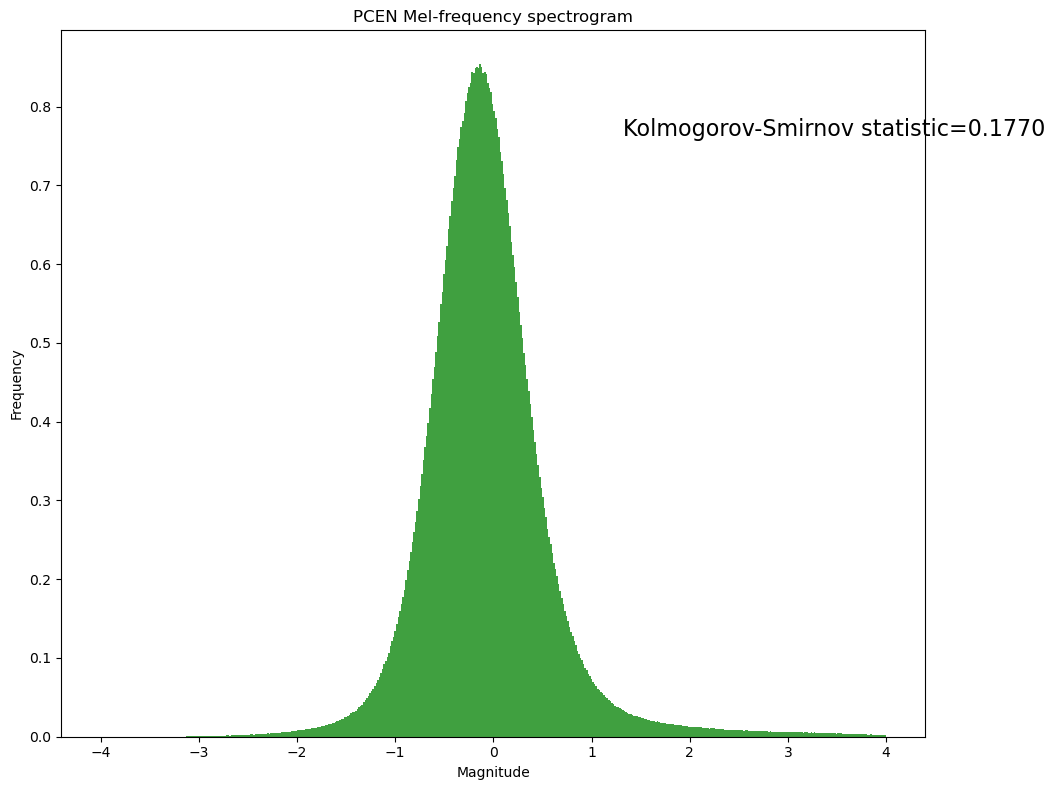

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy.stats import shapiro, kstest, norm

# 设置输入音频文件夹
input_folder = 'E:\Australia\wav3376'  # 替换为你的音频文件夹路径

# 获取音频文件列表
audio_files = [f for f in os.listdir(input_folder) if f.endswith('.wav')]

# 初始化列表以存储logmelspec和PCEN的幅度数据
logmelspec_magnitudes = []
pcen_magnitudes = []
stat_values = []
count = 1

for audio_file in audio_files:
    # 加载音频文件
    filepath = os.path.join(input_folder, audio_file)
    y, sr = librosa.load(filepath, sr=6000)
    print(np.max(y))
    print(f'Processing {filepath}, {count}/{len(audio_files)}')
    
    # 计算mel频谱图
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512, n_mels=64, power=1.0, center=False)
    
    # 对数变换
    S_dB = 20 * np.log10(S + 1e-6)  # 加1e-6防止log(0)
    logmelspec_magnitudes.extend(S_dB.flatten())

    # 应用PCEN，调整参数
    S_pcen = librosa.pcen(S * (2**31), sr=sr, hop_length=512)
    pcen_magnitudes.extend(S_pcen.flatten())

    count += 1

# 将数据转换为numpy数组
logmelspec_magnitudes = np.array(logmelspec_magnitudes)
pcen_magnitudes = np.array(pcen_magnitudes)

print(f'maximum is {np.max(logmelspec_magnitudes)} and minimum is {np.min(logmelspec_magnitudes)}')
print(f'maximum is {np.max(pcen_magnitudes)} and minimum is {np.min(pcen_magnitudes)}')

# 标准化数据（零均值和单位方差）
logmelspec_magnitudes = (logmelspec_magnitudes - np.mean(logmelspec_magnitudes)) / np.std(logmelspec_magnitudes)
pcen_magnitudes = (pcen_magnitudes - np.mean(pcen_magnitudes)) / np.std(pcen_magnitudes)

print(f'maximum is {np.max(logmelspec_magnitudes)} and minimum is {np.min(logmelspec_magnitudes)}')
print(f'maximum is {np.max(pcen_magnitudes)} and minimum is {np.min(pcen_magnitudes)}')

# 进行 Kolmogorov-Smirnov 正态性检验
log_ks_stat, log_ks_p = kstest(logmelspec_magnitudes, 'norm')
pcen_ks_stat, pcen_ks_p = kstest(pcen_magnitudes, 'norm')

print(f'Log-mel spectrogram Kolmogorov-Smirnov test: statistic={log_ks_stat}, p-value={log_ks_p}')
print(f'PCEN spectrogram Kolmogorov-Smirnov test: statistic={pcen_ks_stat}, p-value={pcen_ks_p}')

# 绘制直方图
plt.figure(figsize=(20,8))
'''
# 对数变换直方图
plt.subplot(1, 2, 1)
plt.hist(logmelspec_magnitudes, bins=500, range=(-4, 4), density=True, alpha=0.75, color='blue')
plt.title('Logarithmic Mel-frequency spectrogram')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.annotate(f'Kolmogorov-Smirnov statistic={log_ks_stat:.6f}', xy=(0.75, 0.85), xycoords='axes fraction')
'''
# PCEN直方图
plt.subplot(1, 2, 2)
plt.hist(pcen_magnitudes, bins=500, range=(-4, 4), density=True, alpha=0.75, color='green')
plt.title('PCEN Mel-frequency spectrogram')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.annotate(f'Kolmogorov-Smirnov statistic={pcen_ks_stat:.4f}', xy=(0.65, 0.85), fontsize=16, xycoords='axes fraction')

plt.tight_layout()
plt.show()

0.0105896
Processing E:\Australia\wav3376\5297F9C1_220.wav, 1/865
0.009765625
Processing E:\Australia\wav3376\52981CE9_220.wav, 2/865
0.018463135
Processing E:\Australia\wav3376\529E0825_180.wav, 3/865
0.013946533
Processing E:\Australia\wav3376\529F448D_10.wav, 4/865
0.01373291
Processing E:\Australia\wav3376\529F83D5_240.wav, 5/865
0.0065612793
Processing E:\Australia\wav3376\529FF7D9_190.wav, 6/865
0.0059814453
Processing E:\Australia\wav3376\52A0F175_130.wav, 7/865
0.0072021484
Processing E:\Australia\wav3376\52A1068E_100.wav, 8/865
0.0072021484
Processing E:\Australia\wav3376\52A2386A_10.wav, 9/865
0.012084961
Processing E:\Australia\wav3376\52A2E4AD_80.wav, 10/865
0.014831543
Processing E:\Australia\wav3376\52A34399_270.wav, 11/865
0.0121154785
Processing E:\Australia\wav3376\52A41D90_0.wav, 12/865
0.016082764
Processing E:\Australia\wav3376\52A41D90_100.wav, 13/865
0.015411377
Processing E:\Australia\wav3376\52A41D90_190.wav, 14/865
0.012207031
Processing E:\Australia\wav3376\52

"\n# PCEN直方图\nplt.subplot(1, 2, 2)\nplt.hist(pcen_magnitudes, bins=500, range=(-4, 4), density=True, alpha=0.75, color='green')\nplt.title('PCEN Mel-frequency spectrogram')\nplt.xlabel('Magnitude')\nplt.ylabel('Frequency')\nplt.annotate(f'Kolmogorov-Smirnov statistic={pcen_ks_stat:.4f}', xy=(0.65, 0.85), fontsize=16, xycoords='axes fraction')\n\nplt.tight_layout()\nplt.show()\n"

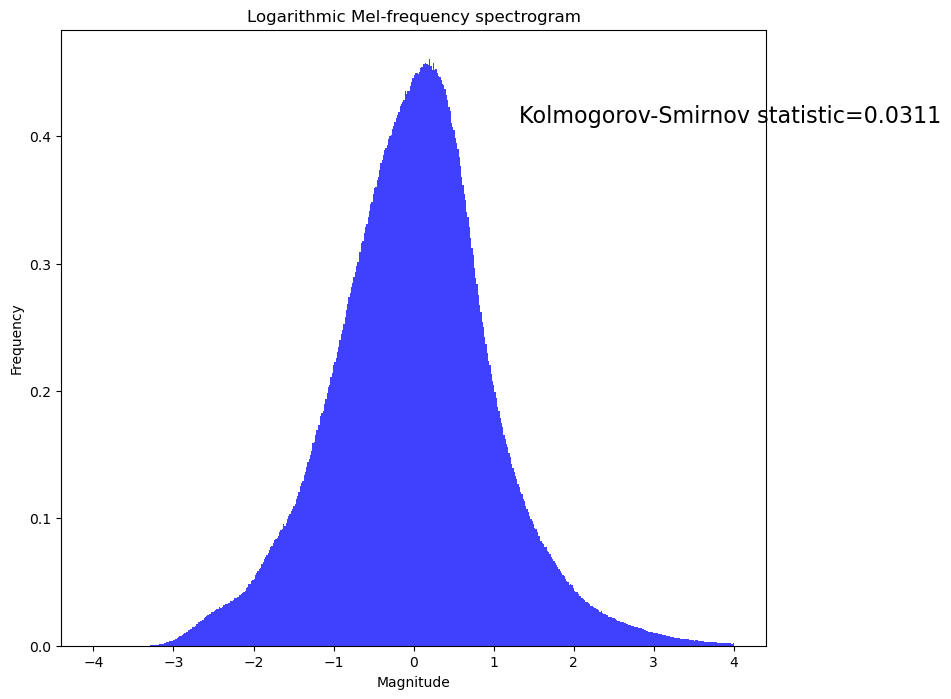

In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy.stats import shapiro, kstest, norm

# 设置输入音频文件夹
input_folder = 'E:\Australia\wav3376'  # 替换为你的音频文件夹路径

# 获取音频文件列表
audio_files = [f for f in os.listdir(input_folder) if f.endswith('.wav')]

# 初始化列表以存储logmelspec和PCEN的幅度数据
logmelspec_magnitudes = []
pcen_magnitudes = []
stat_values = []
count = 1

for audio_file in audio_files:
    # 加载音频文件
    filepath = os.path.join(input_folder, audio_file)
    y, sr = librosa.load(filepath, sr=6000)
    print(np.max(y))
    print(f'Processing {filepath}, {count}/{len(audio_files)}')
    
    # 计算mel频谱图
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512, n_mels=64, power=1.0, center=False)
    
    # 对数变换
    S_dB = 20 * np.log10(S + 1e-6)  # 加1e-6防止log(0)
    logmelspec_magnitudes.extend(S_dB.flatten())

    # 应用PCEN，调整参数
    S_pcen = librosa.pcen(S * (2**31), sr=sr, hop_length=512)
    pcen_magnitudes.extend(S_pcen.flatten())

    count += 1

# 将数据转换为numpy数组
logmelspec_magnitudes = np.array(logmelspec_magnitudes)
pcen_magnitudes = np.array(pcen_magnitudes)

print(f'maximum is {np.max(logmelspec_magnitudes)} and minimum is {np.min(logmelspec_magnitudes)}')
print(f'maximum is {np.max(pcen_magnitudes)} and minimum is {np.min(pcen_magnitudes)}')

# 标准化数据（零均值和单位方差）
logmelspec_magnitudes = (logmelspec_magnitudes - np.mean(logmelspec_magnitudes)) / np.std(logmelspec_magnitudes)
pcen_magnitudes = (pcen_magnitudes - np.mean(pcen_magnitudes)) / np.std(pcen_magnitudes)

print(f'maximum is {np.max(logmelspec_magnitudes)} and minimum is {np.min(logmelspec_magnitudes)}')
print(f'maximum is {np.max(pcen_magnitudes)} and minimum is {np.min(pcen_magnitudes)}')

# 进行 Kolmogorov-Smirnov 正态性检验
log_ks_stat, log_ks_p = kstest(logmelspec_magnitudes, 'norm')
pcen_ks_stat, pcen_ks_p = kstest(pcen_magnitudes, 'norm')

print(f'Log-mel spectrogram Kolmogorov-Smirnov test: statistic={log_ks_stat}, p-value={log_ks_p}')
print(f'PCEN spectrogram Kolmogorov-Smirnov test: statistic={pcen_ks_stat}, p-value={pcen_ks_p}')

# 绘制直方图
plt.figure(figsize=(20,8))

# 对数变换直方图
plt.subplot(1, 2, 1)
plt.hist(logmelspec_magnitudes, bins=500, range=(-4, 4), density=True, alpha=0.75, color='blue')
plt.title('Logarithmic Mel-frequency spectrogram')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.annotate(f'Kolmogorov-Smirnov statistic={log_ks_stat:.4f}', xy=(0.65, 0.85), fontsize=16,xycoords='axes fraction')
'''
# PCEN直方图
plt.subplot(1, 2, 2)
plt.hist(pcen_magnitudes, bins=500, range=(-4, 4), density=True, alpha=0.75, color='green')
plt.title('PCEN Mel-frequency spectrogram')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.annotate(f'Kolmogorov-Smirnov statistic={pcen_ks_stat:.4f}', xy=(0.65, 0.85), fontsize=16, xycoords='axes fraction')

plt.tight_layout()
plt.show()
'''